In [109]:
import pandas as pd
import ast
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import ticker as tic

from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', '{:.2f}'.format)

# Data Ingestion and Overview
## Loading the dataset.

In [110]:
df = pd.read_csv('top_hollywood_grossing_movies.csv')
del df['Unnamed: 0']   # Deleting the first column (indexing column) 

## Running basic statistical summaries

In [111]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Title                       900 non-null    object
 1   Movie Info                  900 non-null    object
 2   Distributor                 900 non-null    object
 3   Release Date                698 non-null    object
 4   Domestic Sales (in $)       900 non-null    int64 
 5   International Sales (in $)  900 non-null    int64 
 6   World Sales (in $)          900 non-null    int64 
 7   Genre                       900 non-null    object
 8   Movie Runtime               900 non-null    object
 9   License                     729 non-null    object
dtypes: int64(3), object(7)
memory usage: 70.4+ KB
None


In [112]:
describe = df.describe()
data_types = df.dtypes
missing_data = df.isnull().sum()

print(f"Summary of data:\n {describe} \n")
print(f"Data Types:\n {data_types} \n")
print(f"Missing data info:\n{missing_data}")

Summary of data:
        Domestic Sales (in $)  International Sales (in $)  World Sales (in $)
count                 900.00                      900.00              900.00
mean            169477644.44                233238328.14        401762640.95
std             104342081.50                218539337.67        309271952.77
min              81903458.00                      260.00         82604699.00
25%             102556632.50                 92225000.00        203388302.25
50%             133849163.00                167081724.00        307034647.50
75%             194232449.00                289673532.50        482728831.75
max             936662225.00               2086738578.00       2847246203.00 

Data Types:
 Title                         object
Movie Info                    object
Distributor                   object
Release Date                  object
Domestic Sales (in $)          int64
International Sales (in $)     int64
World Sales (in $)             int64
Genre          

# Data Preprocessing, Manipulation, and Imputation 
## Cleaning data and addressing missing values

In [113]:
df.mask(df == '')

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN
...,...,...,...,...,...,...,...,...,...,...
895,Beowulf (2007),The warrior Beowulf must fight and defeat the ...,Paramount Pictures,"November 14, 2007",82280579,114113166,196393745,"['Action', 'Adventure', 'Animation', 'Fantasy']",1 hr 55 min,PG-13
896,Bridge to Terabithia (2007),A preteen's life turns upside down when he bef...,Walt Disney Studios Motion Pictures,NaN,82272442,55314621,137587063,"['Drama', 'Family', 'Fantasy']",1 hr 36 min,NaN
897,The Pink Panther (2006),Bumbling Inspector Clouseau must solve the mur...,Sony Pictures Entertainment (SPE),"February 9, 2006",82226474,81889423,164115897,"['Adventure', 'Comedy', 'Crime', 'Mystery']",1 hr 33 min,PG
898,Teenage Mutant Ninja Turtles: Out of the Shado...,The Turtles get into another battle with their...,Paramount Pictures,"June 2, 2016",82051601,163572247,245623848,"['Action', 'Adventure', 'Comedy', 'Sci-Fi']",1 hr 52 min,PG-13


## Converting Run Time to minutes
### 'minutes' function for converting run time to minutes

In [114]:
def minutes(runtime):
    total = 0

    hour_split = runtime.split(' hr')[0] #Grabs data before the 'hr' text
    hours = int(hour_split.strip())      #Strips anything irrelevant and turns it into an int
    total += hours * 60                  #Converts hour to minutes

    if 'min' in runtime:                       #Some runtime had no minutes, only hours eg '2 hr'
        min_split = runtime.split('hr')[-1]    #Everything after hr
        mins = int(min_split.replace('min', ' ').strip())
        total += mins
    return total

In [115]:
for i in range(len(df)):
    df.at[i, 'Movie Runtime'] = minutes(df.at[i, 'Movie Runtime'])
df['Movie Runtime'] = df['Movie Runtime'].astype(int)

## One-hot encoding the Genre field
#### Getting all unique genres into a list

In [116]:
df['Genre'] = df['Genre'].apply(ast.literal_eval)
#df['Genre'] = df['Genre'].apply(lambda x:x if isinstance(x,list) else 0)
unique_genres = set(genre for sublist in df['Genre'] for genre in sublist)

#### Using MLB since data is in the form of lists

In [117]:
mlb = MultiLabelBinarizer()

encoded_genres = mlb.fit_transform(df['Genre'])                  #Transforming 'Genres' into a matrix of 0s and 1s
encoded_df = pd.DataFrame(encoded_genres, columns=mlb.classes_)  #converting encoded_genres into a dataframe
df = pd.concat([df, encoded_df], axis = 1)                       #Joining dataframes
df.drop(columns = ['Genre'], inplace = True)                     #Removing the old 'Genre' column

## Explanation for Choices
### 

#### See which genres grossed the most and least.
#### See what combination of genres did best and what is the optimal amount of genres for a movie

#### See which movies did better domestically compared to internationally and why

#### Determine relationship between runtime and grossing

#### Which studios grossed the most & least (shivani)

#### Relationship between release date and gross

#### Find sequals and determine how they did comared to originals

#### Which years did movies perform the best and worst and what was the economy like at that time (housing crisis)


In [118]:
month1 = pd.to_datetime(df['Release Date'])
month2 = month1.dt.month_name()
gross = df.groupby(month2)["World Sales (in $)"].sum()
gross = gross.reindex(month_order)

In [119]:
date_formatted = pd.to_datetime(df['Release Date'], format="%B %d, %Y")    
month = date_formatted.dt.strftime('%B')
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
month = pd.Categorical(month, categories = month_order, ordered=True)
month_counts = month.value_counts().sort_index()

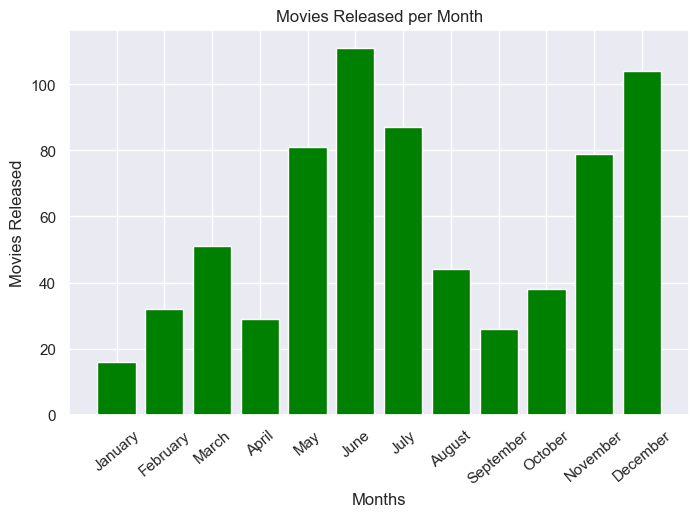

In [120]:
plt.figure(figsize=(8,5))
plt.bar(month_counts.index, month_counts.values, color = 'green')

plt.xlabel('Months')
plt.ylabel('Movies Released')
plt.title('Movies Released per Month')
plt.xticks(rotation=40)
plt.show()

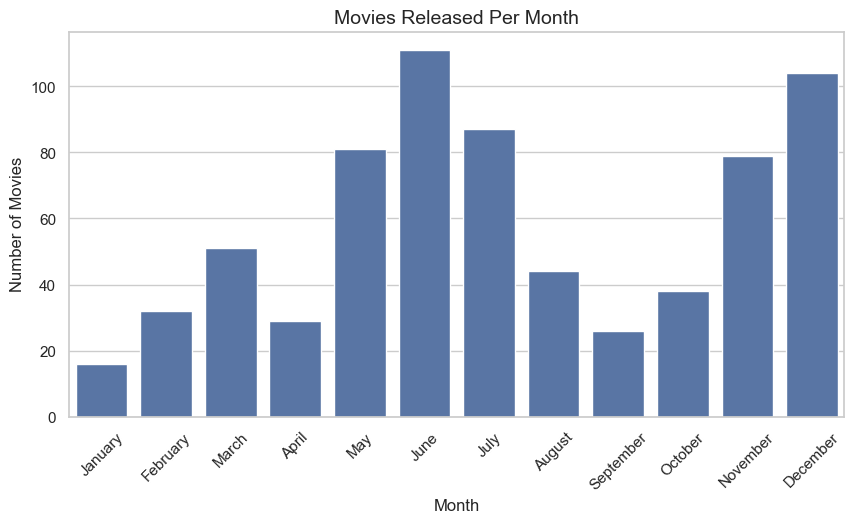

In [121]:

# Set Seaborn style
sns.set_style("whitegrid")

# Create bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=month_counts.index, y=month_counts.values)

# Add labels and title
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.title("Movies Released Per Month", fontsize=14)
plt.xticks(rotation=45)

# Show plot
plt.show()


In [122]:
date_formatted = pd.to_datetime(df['Release Date'], format="%B %d, %Y")    
year = date_formatted.dt.year
year_counts = year.value_counts().sort_index()
year_counts.index = year_counts.index.astype(int)  # Converts the index to integer hopefully

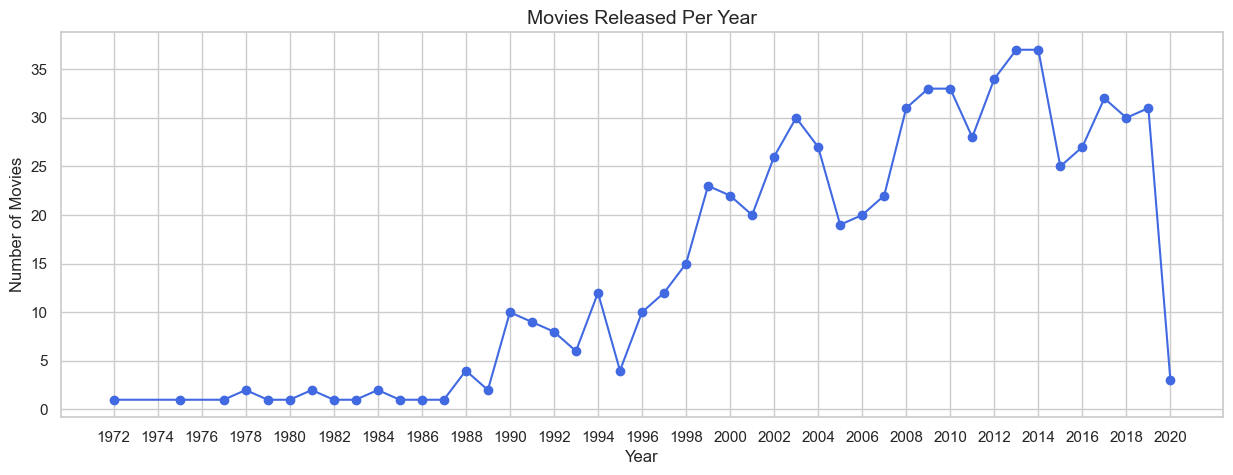

In [123]:
plt.figure(figsize=(15, 5))
plt.plot(year_counts.index, year_counts.values, marker = 'o', color='royalblue')

# Add labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.title("Movies Released Per Year", fontsize=14)
plt.xticks(range(min(year_counts.index), max(year_counts.index) + 1, 2))
plt.show()

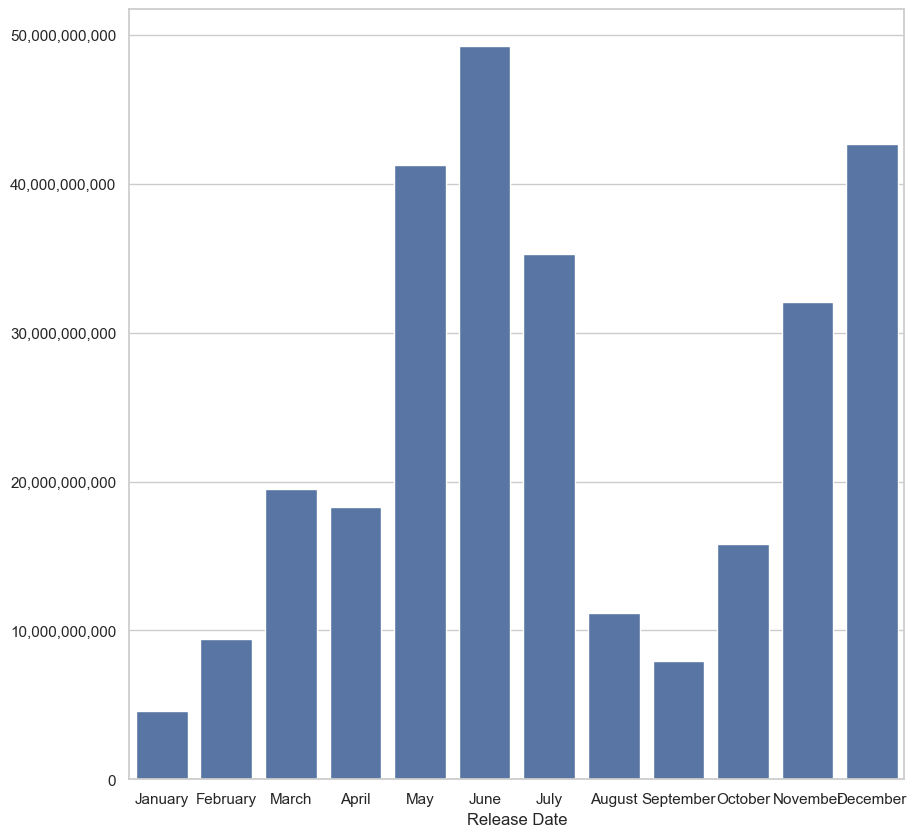

In [124]:
plt.figure(figsize=(10,10))
sns.barplot(x=gross.index, y=gross.values)
plt.gca().yaxis.set_major_formatter(tic.StrMethodFormatter('{x:,.0f}'))
plt.show()

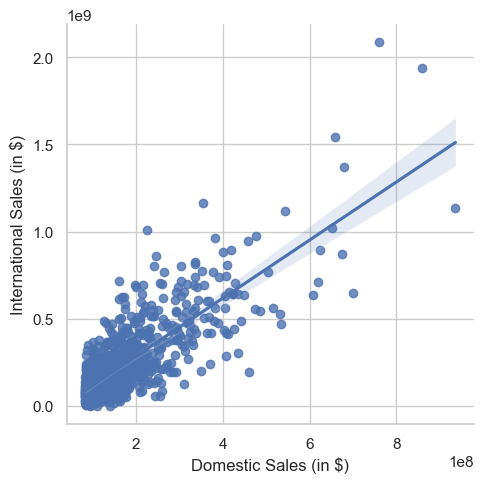

In [125]:
sns.lmplot(x='Domestic Sales (in $)', y = 'International Sales (in $)', data=df)

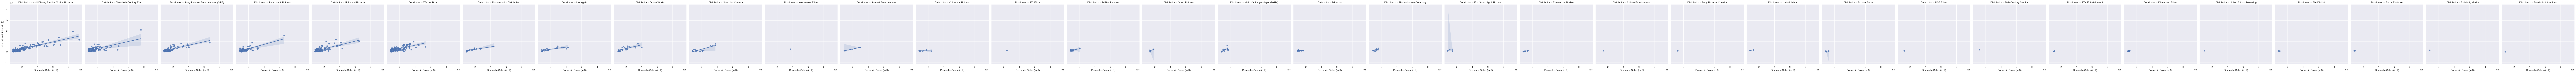

In [126]:
sns.set_theme(rc={'figure.figsize':(15,15)})
sns.lmplot(x='Domestic Sales (in $)', y = 'International Sales (in $)', data=df,col = 'Distributor')
plt.show()

### Most studios in the dataset didn't have enough movies made 
### Dropped all Distributors who made less than 10 films and quartered teh dataset

In [127]:
dist1 = df["Distributor"].value_counts()
dist2 = studio_count[studio_count >= 10]

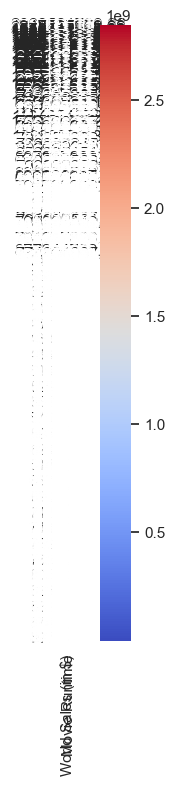

In [131]:
corr = df[['World Sales (in $)', 'Movie Runtime']]
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap = 'coolwarm', fmt='.2f', square=True)
plt.show()

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Title                       900 non-null    object
 1   Movie Info                  900 non-null    object
 2   Distributor                 900 non-null    object
 3   Release Date                698 non-null    object
 4   Domestic Sales (in $)       900 non-null    int64 
 5   International Sales (in $)  900 non-null    int64 
 6   World Sales (in $)          900 non-null    int64 
 7   Movie Runtime               900 non-null    int64 
 8   License                     729 non-null    object
 9   Action                      900 non-null    int64 
 10  Adventure                   900 non-null    int64 
 11  Animation                   900 non-null    int64 
 12  Biography                   900 non-null    int64 
 13  Comedy                      900 non-null    int64 

In [130]:
df['Movie Runtime'] = df['Movie Runtime'].astype(int)